In [1]:
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
import pandas as pd
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [2]:
import phoebe
import numpy as np

logger = phoebe.logger('error')

In [3]:
b=phoebe.default_binary()

In [4]:
print(b.get_adjustable_parameters())

ParameterSet: 30 parameters
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
                        Av@system: 0.0
                        Rv@system: 3.1
         requiv@primary@component: 1.0 solRad
           teff@primary@component: 6000.0 K
           abun@primary@component: 0.0
        syncpar@primary@component: 1.0
          pitch@primary@component: 0.0 deg
            yaw@primary@component: 0.0 deg
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
       requiv@secondary@component: 1.0 solRad
         teff@secondary@component: 6000.0 K
         abun@secondary@component: 0.0
      syncpar@secondary@component: 1.0
        pitch@secondary@component: 0.0 deg
          yaw@secondary@component: 0.0 deg
    gravb_bol@secondary@component: 0.32
   irrad_frac_refl_bol@seconda...: 0.6
          period@binary@component: 1.0 d
            dpdt@binary@component: 0.0 s / yr
            per0@binary@component: 0.0 deg
          d

In [5]:
print(b['t0_supconj@binary@component'])

Parameter: t0_supconj@binary@component
                       Qualifier: t0_supconj
                     Description: Zeropoint date at superior conjunction of the primary component
                           Value: 0.0 d
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component
                      Related to: period@binary@component, ecc@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component



In [6]:
b['vgamma@system']=-6.28

b['requiv@primary@component']=0.793
b['requiv@secondary@component']=0.344

b['teff@primary@component']=5560
b['teff@secondary@component']=3540

b['sma@binary@component']=11.03

b['period@binary@component']= 4.12879
b['per0@binary@component']=92.8
b['ecc@binary@component']=0.0365
b['incl@binary@component']=87.003
b['q@binary@component']=0.553
b['t0_supconj@binary@component']=1


In [7]:
b['gravb_bol@primary@component']=0.4353
b['gravb_bol@secondary@component']=0.3712

## Spots

In [8]:
b.add_feature('spot', component='primary', feature='spot01')
b.add_feature('spot', component='primary', feature='spot02')

<ParameterSet: 5 parameters | contexts: compute, feature>

In [9]:
b.set_value(qualifier='relteff', feature='spot01', value=0.98141)
b.set_value(qualifier='radius', feature='spot01', value=19.97)
b.set_value(qualifier='colat', feature='spot01', value=81.3)
b.set_value(qualifier='long', feature='spot01', value=18.2)

b.set_value(qualifier='relteff', feature='spot02', value=0.9801)
b.set_value(qualifier='radius', feature='spot02', value=14.5)
b.set_value(qualifier='colat', feature='spot02', value=34.9)
b.set_value(qualifier='long', feature='spot02', value= 286.31)

In [10]:
print(b['Av@system'])

Parameter: Av@system
                       Qualifier: Av
                     Description: Extinction Av
                           Value: 0.0
                  Constrained by: 
                      Constrains: ebv@system
                      Related to: Rv@system, ebv@system



In [39]:
lctimes=phoebe.linspace(0,15,501)
rvtimes=phoebe.linspace(0,15,201)
b.add_dataset('lc', times=lctimes, dataset='lc01',overwrite=True)
b.add_dataset('rv', times=rvtimes, dataset='rv01',overwrite=True)


<ParameterSet: 52 parameters | contexts: compute, dataset, figure, constraint>

### As the above did not have limb darkening values, I refered to the previous paper by the same author
[doi:10.1093/mnras/sty2516]

![https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png](https://github.com/Vysakh13579/FITTING_BINARIES/blob/85a643457cd860a495f999754a7afb6de2fc7ea5/param2.png "Title")

In [40]:
b.set_value_all('atm','phoenix')
b.set_value_all('passband','Johnson:V')

In [41]:
print(b.filter(dataset='orb01'))

ParameterSet: 0 parameters
NO PARAMETERS


In [42]:
b.set_value_all(qualifier='ld_mode', value='manual')
b.set_value_all(qualifier='ld_func', value='square_root')
b.set_value_all(qualifier='ld_coeffs', component='primary', value=[0.4786, 0.3242])
b.set_value_all(qualifier='ld_coeffs', component='secondary', value=[ 0.1759, 0.7896])

In [43]:
b.set_value_all('ld_mode_bol', 'manual')
b.set_value_all('ld_func_bol','square_root')
b.set_value('ld_coeffs_bol@primary@component',[ 0.3811, 0.3636])
b.set_value('ld_coeffs_bol@secondary@component',[-0.0427, 0.8284])
b.set_value('irrad_frac_refl_bol@primary@component',0.6)
b.set_value('irrad_frac_refl_bol@secondary@component',0.6)



In [44]:
b.set_value_all('l3_mode', 'fraction')
b.set_value_all('l3_frac', 0.02297)

In [45]:
print(b.run_checks())

Run Checks Report: PASS



In [46]:
b.add_compute('phoebe', compute='fastcompute',overwrite=True)
b.run_compute(compute='fastcompute')

#fluxes = b.get_value('fluxes@model') + np.random.normal(size=lctimes.shape) * 0.001
#fsigmas = np.ones_like(lctimes) * 0.002

#rvsA = b.get_value('rvs@primary@model') + np.random.normal(size=rvtimes.shape) * 7.5
#rvsB = b.get_value('rvs@secondary@model') + np.random.normal(size=rvtimes.shape) * 7.5
#rvsigmas = np.ones_like(rvtimes) * 15

100%|█████████████████████████████████████████████████████████████████████████| 601/601 [03:17<00:00,  3.04it/s]


<ParameterSet: 7 parameters | kinds: rv, lc>

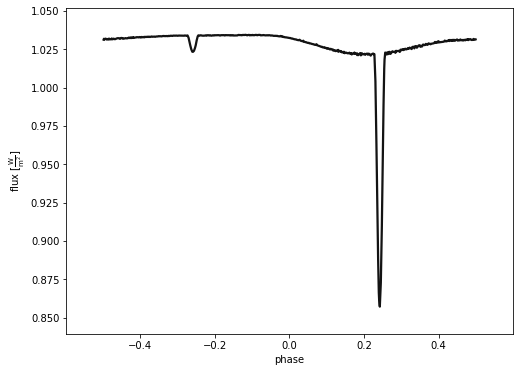

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [19]:
b.plot(x='phases',dataset=['lc01'],t0=0,show=True,legends=True,save='LC_wspots.jpeg')

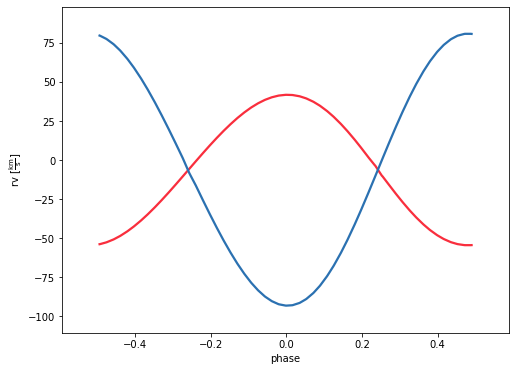

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 576x432 with 1 Axes>)

In [45]:

b.plot(x='phases',dataset=['rv01'],t0=0,
       c={'primary':'red','secondary':'blue'},
       ls={'primary':'-','secondary':'-'},
    
       show=True,
       save='RV_wspots.jpeg')


In [21]:
b.add_dataset('mesh', compute_times=[1.4], dataset='mesh01',overwrite=True)
b.set_value('columns',dataset='mesh01', value=['teffs', 'loggs', '*intensities*'])

In [22]:
b.run_compute(dataset='mesh01',model='meshdata',compute='fastcompute',overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.54it/s]


<ParameterSet: 27 parameters | datasets: mesh01, rv01, lc01>

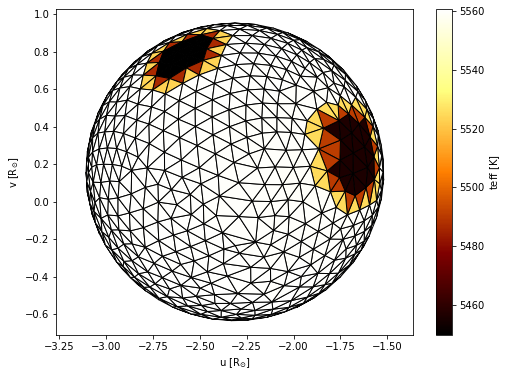

In [23]:
afig, mplfig = b.filter(dataset='mesh01',component='primary').plot(times=1.4,draw_sidebars=True,fc='teffs', show=True,save='Primary_spot.jpeg')

100%|████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 812.64it/s]


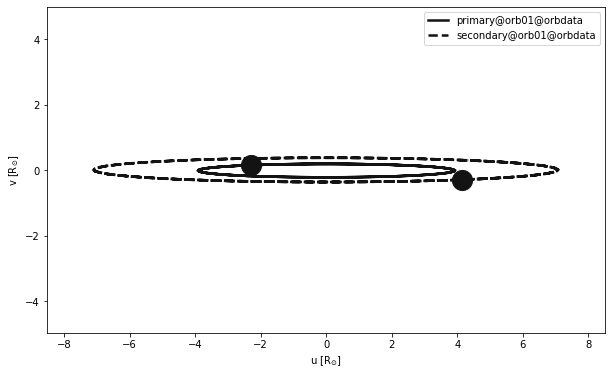

In [31]:
b.add_dataset('orb', times=rvtimes, dataset='orb01',overwrite=True)
#b.set_value('incl@binary@component',0)
b.run_compute(dataset='orb01',model='orbdata',compute='fastcompute',overwrite=True)

fig=plt.figure(figsize=[10,6])
afig, mplfig = b['orb01'].plot(time=1.4, show=True,
       c={'primary':'black','secondary':'black'},legend=True,
        ls={'primary':'-','secondary':'--'},save='orborg.jpeg',fig=fig)

afig, mplfig = b.filter(dataset='mesh01',model='meshdata',component='primary').plot(times=1.4,draw_sidebars=True,
                                                                   fc='teffs', show=True,
                                                                   save='Primary_spot.jpeg',fig=fig)


b.set_value('incl@binary@component',87.003)

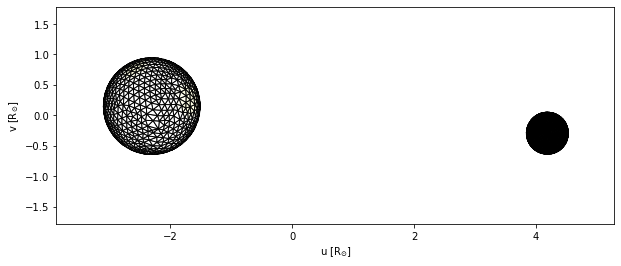

In [54]:
fig=plt.figure(figsize=[10,4])
afig, mplfig = b.filter(dataset='mesh01').plot(times=1.4,fc='teffs',ylim=[-2,2],fig=fig,show=True,save='mesh.jpeg')

In [40]:
print(b['primary@mesh01'])

ParameterSet: 7 parameters
R  times@primary@mesh01@meshda...: [1.4] d
R  uvw_elements@primary@meshda...: [[[-2.31277761  0.95148022
   -1.88761871]
  [-2.37969103  0.94838798
   -1.97542522]
  [-2.42203281  0.94306621
   -1.87385357]]

 [[-2.31277761  0.95148022
   -1.88761871]
  [-2.42203281  0.94306621
   -1.87385357]
  [-2.35511867  0.93846986
   -1.7864522 ]]

 [[-2.31277761  0.95148022
   -1.88761871]
  [-2.35511867  0.93846986
   -1.7864522 ]
  [-2.24586669  0.93920397
   -1.8006201 ]]

 ...

 [[-2.31053446 -0.23492322
   -1.23961891]
  [-2.28821156 -0.27566902
   -1.26414757]
  [-2.20249358 -0.21609525
   -1.23596337]]

 [[-2.31053446 -0.23492322
   -1.23961891]
  [-2.37098279 -0.2534745
   -1.25250758]
  [-2.28821156 -0.27566902
   -1.26414757]]

 [[-2.31053446 -0.23492322
   -1.23961891]
  [-2.37912008 -0.16606754
   -1.20625586]
  [-2.37098279 -0.2534745
   -1.25250758]]] solRad
R  uvw_normals@primary@meshdat...: [[-0.07409309  0.99702273  0.02135136]
 [-0.06373512  0.9928419

In [39]:
nb = phoebe.default_binary()
nb['period@binary@component']=4.12879

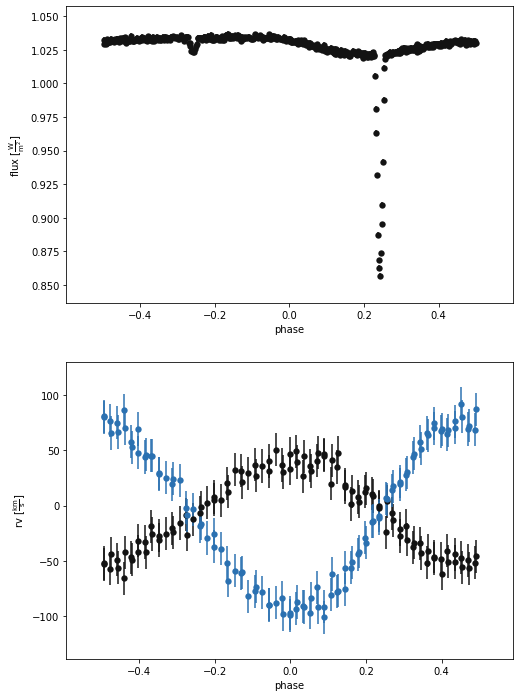

In [40]:
nb.add_dataset('lc', times = lctimes, fluxes=fluxes, sigmas=fsigmas,dataset='lc01', passband='Johnson:V',overwrite=True)
nb.add_dataset('rv',dataset='rv01',overwrite=True)
nb['times@rv@primary'], nb['rvs@rv@primary'], nb['sigmas@rv@primary'] = rvtimes, rvsA, rvsigmas
nb['times@rv@secondary'], nb['rvs@rv@secondary'], nb['sigmas@rv@secondary'] = rvtimes, rvsB, rvsigmas
_ = nb.plot(x='phases', show=True,m='.')

data1=pd.DataFrame({'Times':lctimes,
                   'Fluxes':fluxes,
                   'Sigma':fsigmas})
data1.to_csv('lcdata_wspot.out',index=False,header=False)

data2=pd.DataFrame({'Times':rvtimes,
                   'Fluxes':rvsA,
                       'Sigma':rvsigmas})
data2.to_csv('rv1data_wspot.out',index=False,header=False)

data3=pd.DataFrame({'Times':rvtimes,
                   'Fluxes':rvsB,
                       'Sigma':rvsigmas})
data3.to_csv('rv2data_wspot.out',index=False,header=False)